In [1]:
import random
word_list = ['apple', 'tiger', 'plane', 'chair', 'grape']
chosen_word = random.choice(word_list)
guessed_word = ['_'] * len(chosen_word)
guessed_letters = []
max_attempts = 6
attempts = 0

print("Welcome to Hangman!")
print("Guess the word, one letter at a time.")
print("You have 6 incorrect guesses.\n")

while attempts < max_attempts and '_' in guessed_word:
    print("Word:", ' '.join(guessed_word))
    guess = input("Enter a letter: ").lower()

    if not guess.isalpha() or len(guess) != 1:
        print("Please enter a single valid letter.\n")
        continue

    if guess in guessed_letters:
        print("You already guessed that letter. Try again.\n")
        continue

    guessed_letters.append(guess)

    if guess in chosen_word:
        for idx, char in enumerate(chosen_word):
            if char == guess:
                guessed_word[idx] = guess
        print("Good guess!\n")
    else:
        attempts += 1
        print(f"Wrong guess. You have {max_attempts - attempts} attempts left.\n")

if '_' not in guessed_word:
    print("Congratulations! You guessed the word:", chosen_word)
else:
    print("Game Over! The word was:", chosen_word)


Welcome to Hangman!
Guess the word, one letter at a time.
You have 6 incorrect guesses.

Word: _ _ _ _ _


Enter a letter:  e


Wrong guess. You have 5 attempts left.

Word: _ _ _ _ _


Enter a letter:  a


Good guess!

Word: _ _ a _ _


Enter a letter:  s


Wrong guess. You have 4 attempts left.

Word: _ _ a _ _


Enter a letter:  p


Wrong guess. You have 3 attempts left.

Word: _ _ a _ _


Enter a letter:  v


Wrong guess. You have 2 attempts left.

Word: _ _ a _ _


Enter a letter:  n


Wrong guess. You have 1 attempts left.

Word: _ _ a _ _


Enter a letter:  h


Good guess!

Word: _ h a _ _


Enter a letter:  c


Good guess!

Word: c h a _ _


Enter a letter:  i


Good guess!

Word: c h a i _


Enter a letter:  r


Good guess!

Congratulations! You guessed the word: chair


📈 Welcome to the Stock Portfolio Tracker!



Enter stock symbol (or 'done' to finish):  @


❌ @ is not in the stock list. Available: ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN']


Enter stock symbol (or 'done' to finish):  180


❌ 180 is not in the stock list. Available: ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN']


Enter stock symbol (or 'done' to finish):  TSLA
Enter quantity of TSLA:  243
Enter stock symbol (or 'done' to finish):  DONE



📊 Your Investment Summary:
TSLA: 243 shares × $250 = $60750

💰 Total Investment Value: $60750



Do you want to save the result to a file? (yes/no):  YES
Choose file format (.txt or .csv):  .CSV


✅ Data saved to portfolio.csv



Do you want to visualize your portfolio? (yes/no):  YES


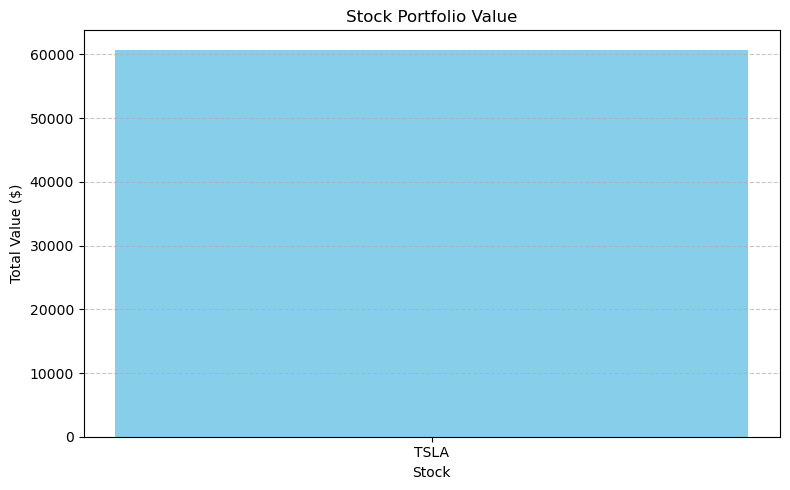

In [3]:
import csv
import os
from colorama import Fore, Style, init
import pandas as pd
import matplotlib.pyplot as plt

# Initialize colorama
init(autoreset=True)

# Hardcoded stock prices
stock_prices = {
    "AAPL": 180,
    "TSLA": 250,
    "GOOG": 140,
    "MSFT": 320,
    "AMZN": 125
}

portfolio = {}
total_value = 0

print(Fore.GREEN + "📈 Welcome to the Stock Portfolio Tracker!\n")

while True:
    stock = input("Enter stock symbol (or 'done' to finish): ").upper()
    if stock == "DONE":
        break
    if stock not in stock_prices:
        print(Fore.RED + f"❌ {stock} is not in the stock list. Available: {list(stock_prices.keys())}")
        continue
    try:
        quantity = int(input(f"Enter quantity of {stock}: "))
    except ValueError:
        print(Fore.RED + "❌ Quantity must be a number.")
        continue
    portfolio[stock] = portfolio.get(stock, 0) + quantity

# Calculate total investment
print("\n" + Fore.YELLOW + "📊 Your Investment Summary:")
for stock, quantity in portfolio.items():
    value = stock_prices[stock] * quantity
    total_value += value
    print(f"{stock}: {quantity} shares × ${stock_prices[stock]} = ${value}")

print(Fore.CYAN + f"\n💰 Total Investment Value: ${total_value}")

# Save to file
save = input("\nDo you want to save the result to a file? (yes/no): ").lower()
if save == 'yes':
    file_type = input("Choose file format (.txt or .csv): ").lower()
    if file_type == '.txt':
        with open("portfolio.txt", "w") as f:
            for stock, quantity in portfolio.items():
                f.write(f"{stock}: {quantity} × ${stock_prices[stock]} = ${stock_prices[stock]*quantity}\n")
            f.write(f"\nTotal Investment Value: ${total_value}")
        print(Fore.GREEN + "✅ Data saved to portfolio.txt")

    elif file_type == '.csv':
        df = pd.DataFrame([{
            "Stock": stock,
            "Quantity": quantity,
            "Price": stock_prices[stock],
            "Total Value": stock_prices[stock] * quantity
        } for stock, quantity in portfolio.items()])
        df.to_csv("portfolio.csv", index=False)
        print(Fore.GREEN + "✅ Data saved to portfolio.csv")

# Optional: Data Visualization
visualize = input("\nDo you want to visualize your portfolio? (yes/no): ").lower()
if visualize == 'yes':
    stocks = list(portfolio.keys())
    values = [stock_prices[stock] * quantity for stock, quantity in portfolio.items()]

    plt.figure(figsize=(8, 5))
    plt.bar(stocks, values, color='skyblue')
    plt.title("Stock Portfolio Value")
    plt.xlabel("Stock")
    plt.ylabel("Total Value ($)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
import os
import shutil
import re
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

def move_jpg_files(source_dir, target_dir):
    try:
        os.makedirs(target_dir, exist_ok=True)
        jpg_files = [f for f in os.listdir(source_dir) if f.lower().endswith('.jpg')]

        for file in tqdm(jpg_files, desc="📂 Moving .jpg files"):
            shutil.move(os.path.join(source_dir, file), os.path.join(target_dir, file))

        print(f"\n✅ Moved {len(jpg_files)} .jpg files from '{source_dir}' to '{target_dir}'.")

    except Exception as e:
        print(f"❌ Error: {e}")

def extract_emails(input_file, output_file):
    try:
        with open(input_file, 'r') as f:
            content = f.read()

        emails = re.findall(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", content)
        emails = sorted(set(emails))

        with open(output_file, 'w') as f:
            for email in emails:
                f.write(email + '\n')

        print(f"✅ {len(emails)} unique emails saved to '{output_file}'.")

    except FileNotFoundError:
        print(f"❌ File '{input_file}' not found.")
    except Exception as e:
        print(f"❌ Error: {e}")

def scrape_webpage_title(url, output_file):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string.strip() if soup.title else 'No title found'

        with open(output_file, 'w') as f:
            f.write(f"URL: {url}\nTitle: {title}\n")

        print(f"✅ Title saved to '{output_file}': {title}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Request error: {e}")
    except Exception as e:
        print(f"❌ Error: {e}")

def main_menu():
    print("\n🛠️ PYTHON TASK AUTOMATION TOOL")
    print("1. Move all .jpg files from one folder to another")
    print("2. Extract emails from a .txt file")
    print("3. Scrape title of a webpage")
    print("4. Exit")

    choice = input("\nEnter your choice (1-4): ")

    if choice == '1':
        src = input("Enter source folder path: ")
        tgt = input("Enter target folder path: ")
        move_jpg_files(src, tgt)

    elif choice == '2':
        inp = input("Enter input .txt file path: ")
        out = input("Enter output .txt file path to save emails: ")
        extract_emails(inp, out)

    elif choice == '3':
        url = input("Enter webpage URL: ")
        out = input("Enter output file name to save title: ")
        scrape_webpage_title(url, out)

    elif choice == '4':
        print("👋 Exiting... Thank you!")
        exit()

    else:
        print("❌ Invalid choice. Please enter 1 to 4.")

if __name__ == "__main__":
    while True:
        main_menu()
        input("\n🔁 Press Enter to return to main menu...")



🛠️ PYTHON TASK AUTOMATION TOOL
1. Move all .jpg files from one folder to another
2. Extract emails from a .txt file
3. Scrape title of a webpage
4. Exit



Enter your choice (1-4):  3
Enter webpage URL:  www.deepthi.com
Enter output file name to save title:  deepthi04


❌ Request error: Invalid URL 'www.deepthi.com': No scheme supplied. Perhaps you meant https://www.deepthi.com?



🔁 Press Enter to return to main menu... return



🛠️ PYTHON TASK AUTOMATION TOOL
1. Move all .jpg files from one folder to another
2. Extract emails from a .txt file
3. Scrape title of a webpage
4. Exit



Enter your choice (1-4):  3
Enter webpage URL:  https://www.deepthi.com
Enter output file name to save title:  deepthi04


❌ Request error: HTTPSConnectionPool(host='www.deepthi.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1000)')))



🔁 Press Enter to return to main menu... return



🛠️ PYTHON TASK AUTOMATION TOOL
1. Move all .jpg files from one folder to another
2. Extract emails from a .txt file
3. Scrape title of a webpage
4. Exit



Enter your choice (1-4):  3


In [ ]:
import os
import shutil
import re
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

def move_jpg_files(source_dir, target_dir):
    try:
        os.makedirs(target_dir, exist_ok=True)
        jpg_files = [f for f in os.listdir(source_dir) if f.lower().endswith('.jpg')]

        for file in tqdm(jpg_files, desc="📂 Moving .jpg files"):
            shutil.move(os.path.join(source_dir, file), os.path.join(target_dir, file))

        print(f"\n✅ Moved {len(jpg_files)} .jpg files from '{source_dir}' to '{target_dir}'.")

    except Exception as e:
        print(f"❌ Error: {e}")

def extract_emails(input_file, output_file):
    try:
        with open(input_file, 'r') as f:
            content = f.read()

        emails = re.findall(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", content)
        emails = sorted(set(emails))

        with open(output_file, 'w') as f:
            for email in emails:
                f.write(email + '\n')

        print(f"✅ {len(emails)} unique emails saved to '{output_file}'.")

    except FileNotFoundError:
        print(f"❌ File '{input_file}' not found.")
    except Exception as e:
        print(f"❌ Error: {e}")

def scrape_webpage_title(url, output_file):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string.strip() if soup.title else 'No title found'

        with open(output_file, 'w') as f:
            f.write(f"URL: {url}\nTitle: {title}\n")

        print(f"✅ Title saved to '{output_file}': {title}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Request error: {e}")
    except Exception as e:
        print(f"❌ Error: {e}")

def main_menu():
    print("\n🛠️ PYTHON TASK AUTOMATION TOOL")
    print("1. Move all .jpg files from one folder to another")
    print("2. Extract emails from a .txt file")
    print("3. Scrape title of a webpage")
    print("4. Exit")

    choice = input("\nEnter your choice (1-4): ")

    if choice == '1':
        src = input("Enter source folder path: ")
        tgt = input("Enter target folder path: ")
        move_jpg_files(src, tgt)

    elif choice == '2':
        inp = input("Enter input .txt file path: ")
        out = input("Enter output .txt file path to save emails: ")
        extract_emails(inp, out)

    elif choice == '3':
        url = input("Enter webpage URL: ")
        out = input("Enter output file name to save title: ")
        scrape_webpage_title(url, out)

    elif choice == '4':
        print("👋 Exiting... Thank you!")
        exit()

    else:
        print("❌ Invalid choice. Please enter 1 to 4.")

if __name__ == "__main__":
    while True:
        main_menu()
        input("\n🔁 Press Enter to return to main menu...")



🛠️ PYTHON TASK AUTOMATION TOOL
1. Move all .jpg files from one folder to another
2. Extract emails from a .txt file
3. Scrape title of a webpage
4. Exit



Enter your choice (1-4):  1
Enter source folder path:  doc.jpg
Enter target folder path:  doc.pdf


❌ Error: [WinError 3] The system cannot find the path specified: 'doc.jpg'



🔁 Press Enter to return to main menu... 



🛠️ PYTHON TASK AUTOMATION TOOL
1. Move all .jpg files from one folder to another
2. Extract emails from a .txt file
3. Scrape title of a webpage
4. Exit


In [ ]:
import json
import os

MEMORY_FILE = "chat_memory.json"

# Load previous memory or initialize
def load_memory():
    if os.path.exists(MEMORY_FILE):
        with open(MEMORY_FILE, 'r') as f:
            return json.load(f)
    return {}

# Save memory to file
def save_memory(memory):
    with open(MEMORY_FILE, 'w') as f:
        json.dump(memory, f)

# Update memory when user says something like "my name is John"
def update_memory(user_input, memory):
    user_input = user_input.lower()
    if "my name is" in user_input:
        name = user_input.split("my name is")[-1].strip().capitalize()
        memory["name"] = name
        return f"Nice to meet you, {name}!"
    elif "i live in" in user_input:
        location = user_input.split("i live in")[-1].strip().capitalize()
        memory["location"] = location
        return f"Got it. You live in {location}."
    return None

# Generate response based on memory and user input
def generate_response(user_input, memory):
    response = update_memory(user_input, memory)
    if response:
        return response

    if "name" in user_input:
        return f"Your name is {memory.get('name', 'not known to me yet')}."
    elif "where do i live" in user_input:
        return f"You live in {memory.get('location', 'an unknown place')}."
    elif "how are you" in user_input:
        return "I'm just a bunch of Python code, but I'm doing great!"
    elif "bye" in user_input:
        return "Goodbye! I'll remember our chat. 👋"
    elif "clear memory" in user_input:
        memory.clear()
        save_memory(memory)
        return "Memory cleared."
    else:
        return "I'm still learning. Could you rephrase or teach me something new?"

# Main chatbot loop
def chatbot():
    print("🤖 Hello! I'm your AI friend. Tell me anything, and I'll remember it.\n(Type 'bye' to exit)\n")
    memory = load_memory()

    while True:
        user_input = input("You: ").strip().lower()
        if not user_input:
            continue

        response = generate_response(user_input, memory)
        print("Bot:", response)
        save_memory(memory)

        if "bye" in user_input:
            break

if __name__ == "__main__":
    chatbot()
